In [1]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras.utils import  plot_model

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
# Reshape and repeat channels
from skimage import color, transform

def preprocess_mnist_for_resnet50(images):
    num_samples = len(images)
    resized_images = np.zeros((num_samples, 224, 224, 3), dtype=np.float32)

    for i in range(num_samples):
        img = transform.resize(images[i], (224, 224))
        img_rgb = color.gray2rgb(img)
        resized_images[i] = img_rgb

    return resized_images

In [4]:
x_train_preprocessed = preprocess_mnist_for_resnet50(x_train)
x_test_preprocessed = preprocess_mnist_for_resnet50(x_test)

print("Original Training Data Shape:", x_train.shape)
print("Preprocessed Training Data Shape:", x_train_preprocessed.shape)
print("Original Testing Data Shape:", x_test.shape)
print("Preprocessed Testing Data Shape:", x_test_preprocessed.shape)

Original Training Data Shape: (60000, 28, 28)
Preprocessed Training Data Shape: (60000, 224, 224, 3)
Original Testing Data Shape: (10000, 28, 28)
Preprocessed Testing Data Shape: (10000, 224, 224, 3)


In [5]:
# Add a new axis
x_train_preprocessed = x_train_preprocessed[:, :, :,:, np.newaxis]
x_test_preprocessed = x_test_preprocessed[:, :, :,:, np.newaxis]


## Preprocessing

In [6]:
#encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
#data standarization
x_train = x_train / 255.0
x_test = x_test / 255.0

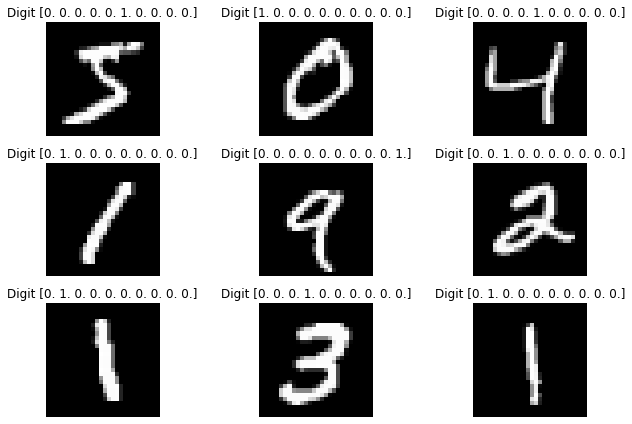

In [8]:
#data visualization
plt.figure(figsize=(10, 6))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  plt.title('Digit {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

## Model

In [9]:
resNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resNet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
resNet50_model.trainable = False

In [11]:
model=keras.Sequential([
    resNet50_model,
    GlobalAveragePooling2D(),
    Dense (10, activation ='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_preprocessed, y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 4429s 2s/step - loss: 1.4805 - accuracy: 0.6079
Epoch 2/2
1875/1875 [==============================] - 4455s 2s/step - loss: 0.8626 - accuracy: 0.8120


## Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test_preprocessed),axis=1),labels=list(np.arange(0,10)))

313/313 [==============================] - 752s 2s/step


Text(0.5, 51.0, 'Predicted label')

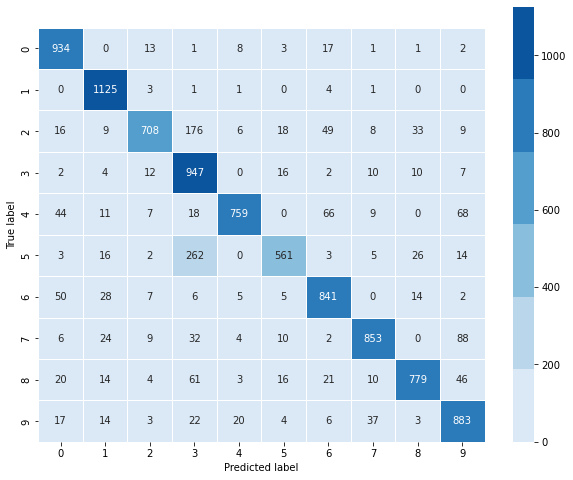

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
plt.ylim([ 10,-0.5,]);
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Precision, Recall, F1-score

In [18]:
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
print(classification_report(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test_preprocessed),axis=1), target_names=target_names))

313/313 [==============================] - 713s 2s/step
              precision    recall  f1-score   support

     Class 0       0.86      0.95      0.90       980
     Class 1       0.90      0.99      0.95      1135
     Class 2       0.92      0.69      0.79      1032
     Class 3       0.62      0.94      0.75      1010
     Class 4       0.94      0.77      0.85       982
     Class 5       0.89      0.63      0.74       892
     Class 6       0.83      0.88      0.85       958
     Class 7       0.91      0.83      0.87      1028
     Class 8       0.90      0.80      0.85       974
     Class 9       0.79      0.88      0.83      1009

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000



# Conclusion

we trained LeNet architecture on MNIST dataset after applying labels encoding and data standaraization as preprocessing for data. we trained 2 layers of cnn2D and 2 layers from average poling and used adam optimizer and used tanh as activation function in two layers and softmax as last layer activation function we get accuracy 0.99